# First-Visit Monte Carlo Policy Evaluation (Exemplo Gridworld)

Vamos implementar o algoritmo de Monte-Carlo para avaliação iterativa de política no exemplo gridworld 3x3 e comparar a função valor $V_{\pi}(s)$ de política aleatória com a obtida nos slides a partir de apenas 4 episódios.

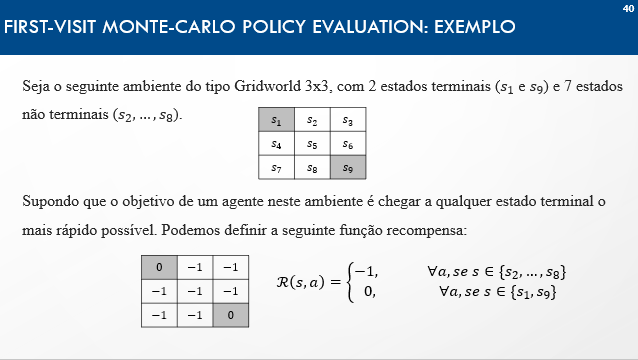

## Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

## Funções Auxiliares

In [36]:
#------------------------------------------------------------------------------
# fig2img(fig)
#
# INPUT:
# fig: matplotlib figure object
#
# OUTPUT:
# img: Image of the given figure
#------------------------------------------------------------------------------
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf, orientation='landscape')
    buf.seek(0)
    img = Image.open(buf)
    return img

## Environment Class

In [37]:

#--------------------------------------------
# GridWorld
# PROPERTIES:
# Grid_matrix: 2D Numpy array representing GridWorld (1: Path, 0: Terminal State)
# gamma: Discount Factor
#
# METHODS:
# __init__: Class default constructor
# show(self, state): Show the GridWorld on given state
# step(self, state, action): Perform Environment Dynamics step given state and action
class GridWorld:
    def __init__(self, Grid_matrix, gamma):
        self.Grid_matrix = Grid_matrix
        self.gamma = gamma

        # State Space
        State_Space = []
        for i in range(np.shape(Grid_matrix)[0]):
            for j in range(np.shape(Grid_matrix)[1]):
                State_Space.append(np.array([i,j]))
        # Action Space
        # 'N': North, 'S': South, 'E': East, 'W': West
        Action_Space = ['N','S','E','W']

        self.state_space = State_Space
        self.action_space = Action_Space
    
    
    #------------------------------------------------------------------------------
    # show(self, state)
    #
    # INPUT:
    # state: Current agent position (1D numpy array with shape=(2,) or list)
    # open_figure: Whether to open the matplotlib figure or just return as image
    #
    # OUTPUT:
    # img: Image of the Environment
    #------------------------------------------------------------------------------
    def show(self, state, open_figure=True):
        fig = plt.figure()
        ax = fig.gca()
        # Plot GridWorld
        ax.imshow(self.Grid_matrix, interpolation='nearest', cmap=cm.Greys_r)
        # Plot Agent
        ax.scatter(state[1], state[0], s=128, color='b')

        grid_shape_0 = np.shape(self.Grid_matrix)[0]
        grid_shape_1 = np.shape(self.Grid_matrix)[1]

        for i in range(0, grid_shape_0):
            ax.plot([-0.5, grid_shape_1-0.5], [i-0.5, i-0.5], color='black', alpha=.33, linestyle=':')
        for i in range(0, grid_shape_1):
            ax.plot([i-0.5, i-0.5], [-0.5, grid_shape_0-0.5], color='black', alpha=.33, linestyle=':')
        
        img = fig2img(fig)
        if (open_figure==False):
            plt.close(fig)
            return img
        

        
    #------------------------------------------------------------------------------
    # step(self, state, action)
    #
    # INPUT:
    # state: Current agent position (1D numpy array with shape=(2,) or list)
    # action: Action taken (0: Stand Still, 1: North, 2: South, 3: East, 4: West)
    #
    # OUTPUT:
    # next_state: Next agent position (1D numpy array with shape=(2,) or list)
    # reward: Immediate Reward obtained (float)
    #------------------------------------------------------------------------------
    def step(self, state, action):
            
        # a = 'N': North
        if (action == 'N'):
            next_pos = np.array([state[0] - 1, state[1]])
            if (next_pos[0] < 0 or next_pos[0] >= np.shape(self.Grid_matrix)[0]):
                next_state = state
            else:
                next_state = next_pos
                
        # a = 'S': South
        elif (action == 'S'):
            next_pos = np.array([state[0] + 1, state[1]])
            if (next_pos[0] < 0 or next_pos[0] >= np.shape(self.Grid_matrix)[0]):
                next_state = state
            else:
                next_state = next_pos
        
        # a = 'E': East
        elif (action == 'E'):
            next_pos = np.array([state[0], state[1] + 1])
            if (next_pos[1] < 0 or next_pos[1] >= np.shape(self.Grid_matrix)[1]):
                next_state = state
            else:
                next_state = next_pos
        
        # a = 'W': West
        elif (action == 'W'):
            next_pos = np.array([state[0], state[1] - 1])
            if (next_pos[1] < 0 or next_pos[1] >= np.shape(self.Grid_matrix)[1]):
                next_state = state
            else:
                next_state = next_pos
        
        else:
            print('Invalid Action!')
        
        
        
        # Reward
        done = False
        if (self.Grid_matrix[state[0]][state[1]] == 0):
            done = True
            reward = 0
            next_state = state
        else:
            reward = -1
        
        
        return reward, next_state, done
    

    #------------------------------------------------------------------------------
    # reset(self)
    #
    # INPUT:
    #
    # OUTPUT:
    # initial_state: Initial state randomly sampled from all possible states
    #------------------------------------------------------------------------------
    def reset(self):
        n = len(self.state_space)
        valid_state = False
        while(not valid_state):
            initial_state_index = np.random.choice(np.arange(n))
            initial_state = self.state_space[initial_state_index]
            if (self.Grid_matrix[initial_state[0]][initial_state[1]] == 1):
                valid_state = True

        return initial_state
    


    
                

### Create Environment

State Space: [array([0, 0]), array([0, 1]), array([0, 2]), array([0, 3]), array([1, 0]), array([1, 1]), array([1, 2]), array([1, 3]), array([2, 0]), array([2, 1]), array([2, 2]), array([2, 3]), array([3, 0]), array([3, 1]), array([3, 2]), array([3, 3])]
Action Space: ['N', 'S', 'E', 'W']


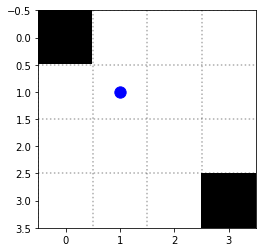

In [38]:
# GridWorld matrix
#Grid_matrix = np.array([[0, 1, 1],\
#                        [1, 1, 1],\
#                        [1, 1, 0]])
Grid_matrix = np.array([[0, 1, 1, 1],\
                        [1, 1, 1, 1],\
                        [1, 1, 1, 1],\
                        [1, 1, 1, 0]])

       
# Create Environment
env = GridWorld(Grid_matrix, gamma=1)
env.show(state=np.array([1,1]))

# State Space
state_space = env.state_space
print('State Space: ' + str(state_space))
# Action Space
action_space = env.action_space
print('Action Space: ' + str(action_space))

In [39]:
def state_index(state):
    for i in range(0,len(state_space)):
        s = state_space[i]
        if np.all(s == state):
            return i
    
    print('ERROR: State not found!')
    return 0

## Transition Class

In [40]:
class Transition():
    def __init__(self,s,a,r,s_next,done):
        self.s = s
        self.a = a
        self.r = r
        self.s_next = s_next
        self.done = done

## Agent Class

In [41]:
#--------------------------------------------
# Agent
# PROPERTIES:
# policy: Numpy array representing agent's policy 
#         (shape = (n,m), where n = len(state_space) and m = len(action_space))
#
# METHODS:
# __init__: Class default constructor
# get_action: Apply policy to obtain action given current state.
class Agent:
    def __init__(self, policy):
        self.policy = policy
    
    def get_action(self, state):
        # get state index
        s_index = state_index(state)
        # Obtain distribution of action probabilities from policy given state
        probabilities = self.policy[s_index,:]
        # get action index
        a_index = np.random.choice(np.arange(m),p=probabilities)
        # get action
        action = action_space[a_index]

        return action

        

### Create Random Agent

In [42]:
n = len(state_space)
m = len(action_space)
random_policy = (1/m)*np.ones((n,m))
print('Random Policy')
print(random_policy)

# Create Random Agent
random_agent = Agent(random_policy)

Random Policy
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


## Generate Episode

Vamos implementar uma função que, dado um agente, gera um episódio no ambiente GridWorld e retorna uma lista de transições.

In [43]:
def generate_episode(env, agent):
    episode = []
    # Initialize state
    s = env.reset()
    # Main Episode Loop
    done = False
    while(not done):
        # Get action from agent
        a = agent.get_action(s)
        # Execute action and observe next state and reward
        r, s_next, done = env.step(s,a)
        # Store transition
        t = Transition(s,a,r,s_next,done)
        episode.append(t)
        # Evolve state
        s = s_next
    
    return episode



In [44]:
episode = generate_episode(env,random_agent)

## Plot Episode

In [45]:
def plot_episode(env,episode):
    for transition in episode:
        print('---------------------------')
        print('s = ' + str(transition.s))
        print('a = ' + str(transition.a))
        print('r = ' + str(transition.r))
        print('s_next = ' + str(transition.s_next))
        print('done = ' + str(transition.done))
        # Show Environment on each state
        env.show(state=transition.s)

---------------------------
s = [2 1]
a = N
r = -1
s_next = [1 1]
done = False
---------------------------
s = [1 1]
a = N
r = -1
s_next = [0 1]
done = False
---------------------------
s = [0 1]
a = E
r = -1
s_next = [0 2]
done = False
---------------------------
s = [0 2]
a = N
r = -1
s_next = [0 2]
done = False
---------------------------
s = [0 2]
a = N
r = -1
s_next = [0 2]
done = False
---------------------------
s = [0 2]
a = W
r = -1
s_next = [0 1]
done = False
---------------------------
s = [0 1]
a = W
r = -1
s_next = [0 0]
done = False
---------------------------
s = [0 0]
a = S
r = 0
s_next = [0 0]
done = True


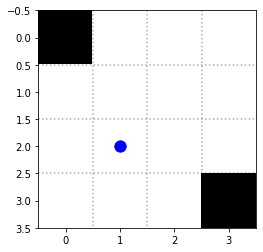

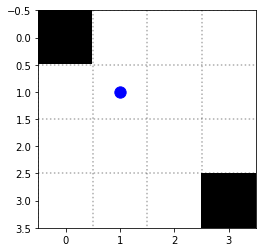

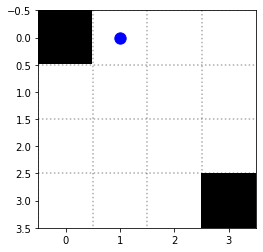

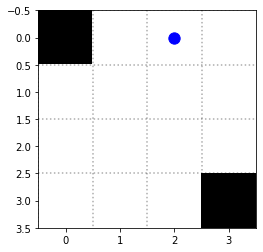

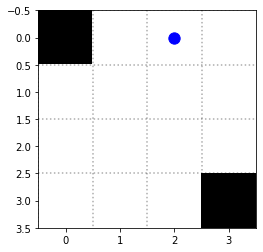

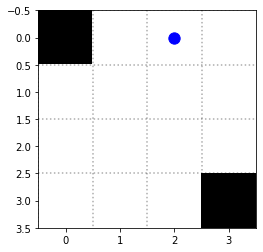

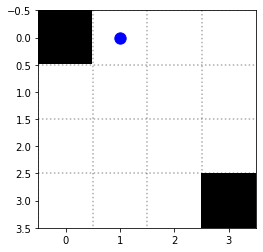

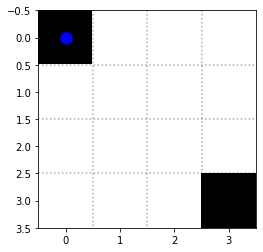

In [46]:
plot_episode(env,episode)

## Monte-Carlo Policy Evaluation

Vamos aplicar o algoritmo de Monte-Carlo para avaliar a Função Valor dos Estados $V_{\pi}(s)$ associada a política aleatória.

In [47]:
def first_visit(visited_states, state):
    first_visit = True
    for s in visited_states:
        if np.all(s == state):
            first_visit = False
    
    return first_visit

In [48]:
def first_visit_monte_carlo_policy_evaluation(env,agent,N_eps=1000):
    n = len(env.state_space)
    # Initialize Sum of Returns S and State Visit Count N
    S = np.zeros(n)
    N = np.zeros(n)
    # Loop over episodes
    for i in range(N_eps):
        episode = generate_episode(env,random_agent)
        G = 0
        T = len(episode)
        # Loop over timesteps on episode
        for t in range(T-1,-1,-1):
            transition = episode[t]
            G = env.gamma*G + transition.r
            visited_states = [e.s for e in episode[0:t]]
            if (first_visit(visited_states, transition.s)):
                s_index = state_index(transition.s)
                N[s_index] += 1
                S[s_index] += G
    
    # Value Function Estimate V ~ S/N
    V = S/N
    return V



In [49]:
V = first_visit_monte_carlo_policy_evaluation(env,random_agent,N_eps=20000)

## Plot Value Function

In [50]:
def plot_value_function(env,V):
    value_function_matrix = np.zeros(np.shape(env.Grid_matrix))

    for s_index in range(len(V)):
        state = env.state_space[s_index]
        value_function_matrix[state[0]][state[1]] = V[s_index]
    
    print('V = ')
    print(value_function_matrix)

    fig = plt.figure()
    ax = fig.gca()
    C = ax.imshow(value_function_matrix, interpolation='nearest', cmap='RdYlGn') # Plot Value Function Colormap
    fig.colorbar(C, ax=ax) # Add Colorbar
    ax.set_title('GridWorld: Value Function') # Set Title


V = 
[[  0.         -14.07834628 -19.99477683 -22.1266028 ]
 [-13.95645342 -17.94553317 -19.96531958 -20.12594877]
 [-20.00611477 -19.980499   -17.79897191 -13.90207114]
 [-21.80504056 -19.94146111 -13.79407791   0.        ]]


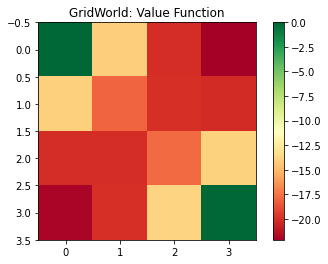

In [51]:
plot_value_function(env,V)